# Exercise

# #1

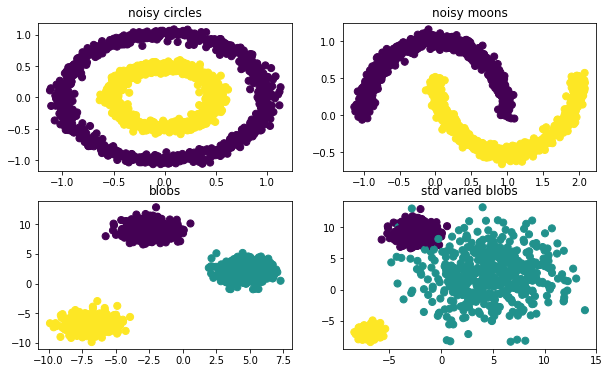

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

#Attempt to compare different clustering algorithms 
#Based on how they cluster, as well as time
#-K-means
#-Spectral clustering
#-Mini-Batch K-means
#-Gaussian mixture
#-DBSCAN - although I did not teach you, it is simply a density-based
#that treats nearby instance as neighbors.  Definitely it has
#two parameters that define "what" proximity is considered neighbors
#here is the data

def plot_clusters(ax, datasets, title):
    X, y = datasets
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax.set_title(title)

n_samples = 1500
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']
for i, axi in enumerate(ax.flat):
    plot_clusters(axi, datasets[i], title[i])


# Solution

# #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

#Attempt to compare different clustering algorithms 
#Based on how they cluster, as well as time
#-K-means
#-Spectral clustering
#-Mini-Batch K-means
#-Gaussian mixture
#-DBSCAN - although I did not teach you, it is simply a density-based
#that treats nearby instance as neighbors.  Definitely it has
#two parameters that define "what" proximity is considered neighbors
#here is the data

def plot_clusters(ax, datasets, title):
    X, y = datasets
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax.set_title(title)

n_samples = 1500
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']
for i, axi in enumerate(ax.flat):
    plot_clusters(axi, datasets[i], title[i])



#defining the models for noisy circle and noisy moon
kmeans = cluster.KMeans(n_clusters=2)
mini_batch_kmeans = cluster.MiniBatchKMeans(n_clusters=2)
